## Estadística Aplicada
Sesión 7 - 05 Septiembre

Cinthia Zaydé García Belmonte 2076329

In [8]:
## Librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Especializada
from lifelines import ExponentialFitter

In [13]:
datos_exp = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')
datos_exp

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [15]:
#Estimar un modelo exponencial
exp = ExponentialFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>

In [16]:
#a) Riesgo de recaer
exp.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [17]:
#Prob de recaer en el mes 16 o s(16)
exp.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [43]:
exp.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

In [18]:
exp.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,10,10
5.0,1,1,0,0,10
8.0,1,1,0,0,9
12.0,1,1,0,0,8
16.0,1,0,1,0,7
17.0,2,1,1,0,6
19.0,1,0,1,0,4
24.0,1,1,0,0,3
30.0,1,0,1,0,2


(0.0, 1.0)

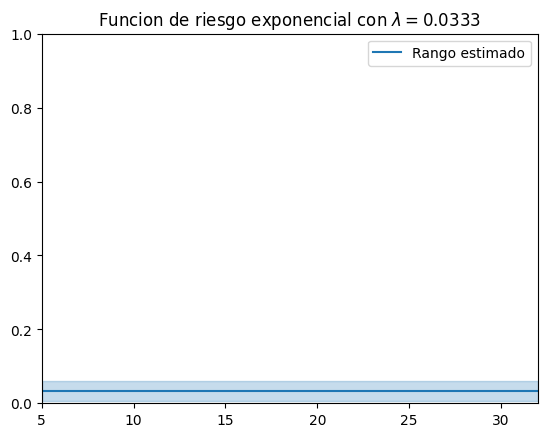

In [31]:
exp.plot_hazard(label = 'Rango estimado')
plt.title('Funcion de riesgo exponencial con $\lambda = 0.0333$')
plt.xlim(5,32)
plt.ylim(0,1)


(5.0, 32.0)

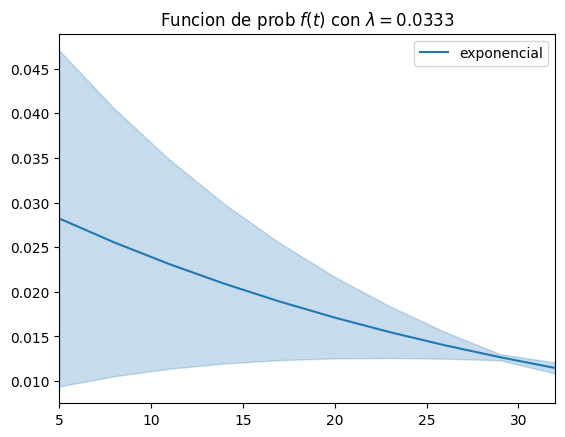

In [33]:
# f(t)
exp.plot_density(label = 'exponencial')
plt.title('Funcion de prob $f(t)$ con $\lambda = 0.0333$')
plt.xlim(5,32)

(5.0, 32.0)

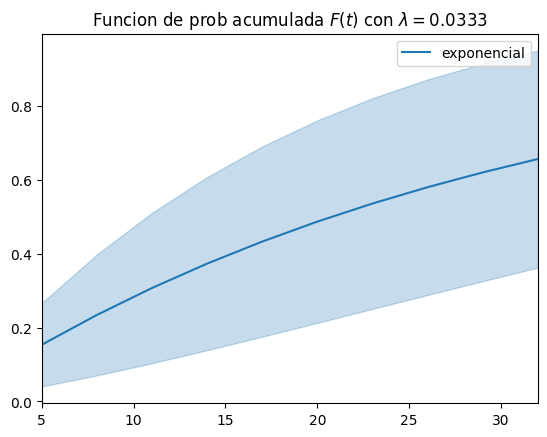

In [32]:
#F(t)
exp.plot_cumulative_density(label = 'exponencial')
plt.title('Funcion de prob acumulada $F(t)$ con $\lambda = 0.0333$')
plt.xlim(5,32)

(5.0, 32.0)

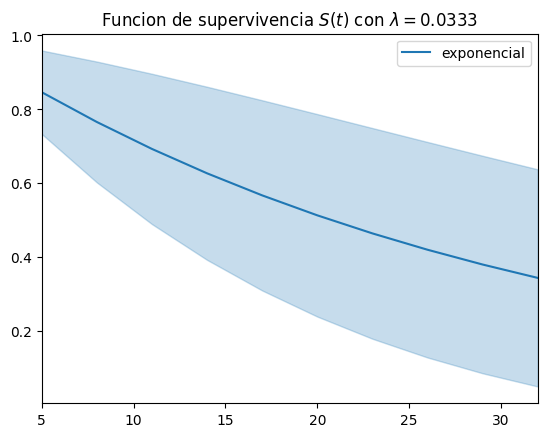

In [34]:
#S(t)
exp.plot_survival_function(label = 'exponencial')
plt.title('Funcion de supervivencia $S(t)$ con $\lambda = 0.0333$')
plt.xlim(5,32)

In [35]:
from lifelines import WeibullFitter

los datos se comportan como una funcion de densidad de prob weibull

In [36]:
mweibull = WeibullFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])

(5.0, 32.0)

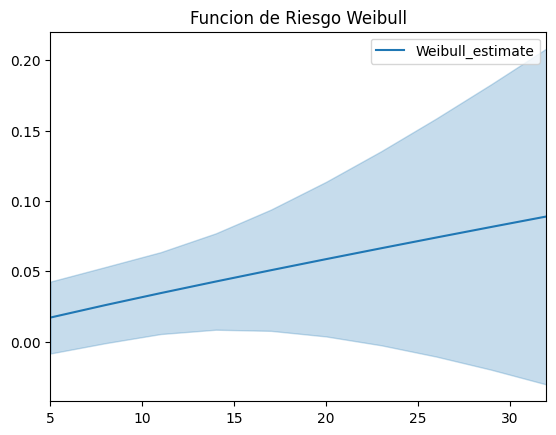

In [37]:
mweibull.plot_hazard()
plt.title('Funcion de Riesgo Weibull')
plt.xlim(5,32)

In [38]:
#mweibull rho
mweibull.rho_

1.8867259500116444

In [39]:
from lifelines import  LogNormalFitter

In [40]:
mlog = LogNormalFitter().fit(datos_exp[ ' tiempo'], datos_exp[' estado'])

(5.0, 32.0)

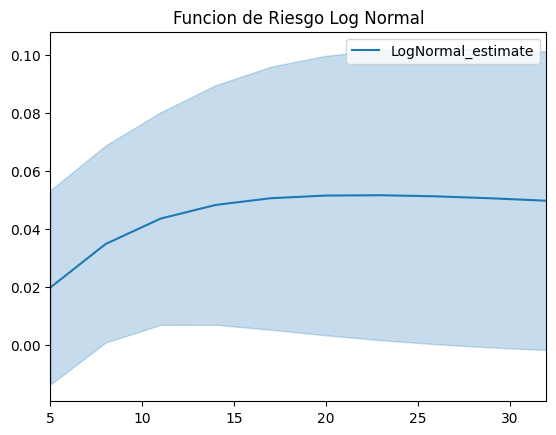

In [41]:
mlog.plot_hazard()
plt.title('Funcion de Riesgo Log Normal')
plt.xlim(5,32)

In [42]:
mlog.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


In [45]:
print('Exp:', exp.AIC_.round(2), ', Weibull:', mweibull.AIC_.round(2), ', Lognormal:', mlog.AIC_.round(2))


Exp: 54.81 , Weibull: 54.16 , Lognormal: 54.51


AIC = Criterio Akaike 

El mejor modelo es el de menor valor AIC

El tiempo de recaida de esya enfermedad se ajusta mejor a un modelo Weibull, que implica un riesgo creciente (conforme más pasa el tiempo se incrementa el riesgo de recaer)